# Create and visualize indicator using Python
เวิร์กช็อปนี้มาฝึกเขียนโค้ด Python กันเพื่อ โหลดไฟล์ราคา, visualize กราฟราคา, สร้างอินเคเตอร์, visualize อินดิเคเตอร์กันครับ

### วัตถุประสงค์
1. เพื่อสร้างความชำนาญในการโหลดไฟล์ราคา
2. เพื่อสร้างความชำนาญในการสร้างอินดิเคเตอร์ชนิดต่างๆ และเพื่อฝึกใช้ Pandas-TA ซึ่งเป็น Python library ที่มีฟังก์ชั่นคำนวณเพื่อสร้างอินดิเคเตอร์ต่างๆ ให้ โดยเราไม่ต้องเขียนโค้ดคณิตศาสตร์คำนวณเองเลย แค่เรียกใช้ฟังก์ชั่นก็พอ
3. เพื่อสร้างความชำนาญในการ visualize กราฟราคา และ อินดิเคเตอร์

อยากให้ฝึกกันให้คล่องนะครับ โดยเฉพาะข้อ 1 กับ 2 เพราะในการทำ model & bot จะได้ใช้เป็นประจำเลย

## Import packages and declare utility functions

cell ด้านล่างนี้เป็นการ import Python package ต่างๆ ที่จำเป็น และเป็นการประกาศฟังก์ชั่นอำนวยความสะดวกต่างๆ แค่รันด้วยคำสั่ง Ctrl + Enter หรือกดปุ่ม Run เท่านั้นครับ ไม่ต้องแก้ไขโค้ดใดๆ ใน cell นี้

In [15]:
import os
import pandas as pd
import numpy as np
import pandas_ta as pdta
import matplotlib.pyplot as plt
import mplfinance as mpf


def load_price_file(source_price_path, price_file, price_columns):    
    # โหลดไฟล์ราคาเป็น DataFrame
    df = pd.read_csv(f'{source_price_path}/{price_file}')
    df.columns = price_columns
    if 'time' in list(df.columns) or 'TIME' in list(df.columns):
        df['TIME'] = df['TIME'].astype('string')    
        df['TIME'] = df['TIME'].map('{:0>6}'.format)
    return df

def data_range(df_dataset, from_date='', to_date='', window=100):
    dt_col = 'DATETIME' if 'DATETIME' in df_dataset else 'datetime'
    
    if from_date == '' and to_date == '':
        df_dataset = df_dataset.iloc[df_dataset.shape[0]-window:df_dataset.shape[0], :].copy()
    else:
        if from_date is not None and from_date != '' and to_date is not None and to_date != '':
            from_date = '{}000000'.format(from_date.replace('-', ''))
            to_date = '{}235500'.format(to_date.replace('-', ''))

            df_dataset = df_dataset.loc[(df_dataset[dt_col].astype(str) >= from_date) \
                                            & (df_dataset[dt_col].astype(str) <= to_date)]
            df_dataset = df_dataset.reset_index(drop=True)

    return df_dataset

def build_ohlc_df(df_master):
    df = pd.DataFrame(df_master, copy=True)
    df['DATETIME'] = df_master['DATETIME']
    df['Open'] = df_master['OPEN']
    df['High'] = df_master['HIGH']
    df['Low'] = df_master['LOW']
    df['Close'] = df_master['CLOSE']
    return df

def plot_df(data, col, title, x_label, y_label, plot_label, data_x=None, data_y=None
            , chart_width=20, chart_height=8
            , fontsize_axis=14, fontsize_title=20, fontsize_legend=1
            , legend_position='upper right'):
    plt.figure(figsize=(chart_width, chart_height))
    if data is not None:
        x = np.arange(data.shape[0])
        y = data[col]
    else:
        x = data_x
        y = data_y
    plt.plot(x, y, label=plot_label)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(loc='upper right', fontsize=1)
    plt.show()

def plot_ohlc(data, type='candle', style='charles', title='Signals'
             , ylabel='Prices', figratio=(20, 8)
             , addplot=None,):
    if addplot is None:
        mpf.plot(data, type=type, style=style, title=title
                 , ylabel=ylabel, figratio=figratio
                 , **{'warn_too_much_data':data.shape[0] + 1}
                 ,)
    else:
        mpf.plot(data, type=type, style=style, title=title
                 , ylabel=ylabel, figratio=figratio, addplot=addplot
                 , **{'warn_too_much_data':data.shape[0] + 1}
                 ,)

## Load price data file
โหลดไฟล์ราคากันก่อนนะครับ เพื่อจะได้มีข้อมูลราคาไว้ใช้คำนวณอินดิเคเตอร์กัน

In [16]:
source_price_path = '../datasets/CRYPTO'
price_file = 'BTCUSDT_M5.csv'

# เช่น 20221130 ก็ระบุ %Y%m%d, 2022-11-30 ก็ระบุ %Y-%m-%d หากไม่ใช่ฟอร์แมตดังกล่าวให้ปรึกษากันในกลุ่ม DeepQuant ได้ครับ
price_date_format = '%Y%m%d'

# เปิดไฟล์ราคาตรวจทานก่อนเสมอ มีชื่อคอลัมน์อะไรบ้าง เพราะบางไฟล์ date กับ time เป็นคอลัมน์เดียวกัน บางไฟล์ก็มีคอลัมน์ volume ด้วย
price_columns = ['DATETIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']

# โหลดไฟล์ราคา
dataset = load_price_file(source_price_path, price_file, price_columns)

# แสดงตารางข้อมูลราคา
dataset

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME
0,20151008134000,0.00,242.96,0.00,242.96,0.00000
1,20151008134500,242.96,243.00,242.96,243.00,0.00000
2,20151008135000,243.00,245.00,243.00,245.00,0.00000
3,20151008135500,245.00,245.00,245.00,245.00,0.00000
4,20151008140000,245.00,245.00,244.50,244.50,0.00000
...,...,...,...,...,...,...
738592,20221021233500,19177.04,19178.72,19171.35,19173.45,44.59226
738593,20221021234000,19172.65,19178.51,19161.75,19162.07,95.44350
738594,20221021234500,19162.07,19173.26,19160.32,19165.42,37.45269
738595,20221021235000,19165.42,19172.01,19160.00,19168.54,32.17750


## Visualize price chart

visualize กราฟราคาแบบกราฟแท่งเทียนกันครับ ตัวอย่างด้านล่างใช้ Python library ชื่อ MplFinance มาช่วยในการพล็อตกราฟราคาแบบแท่งเทียนครับ

อ้างอิง
- MplFinance: https://github.com/matplotlib/mplfinance

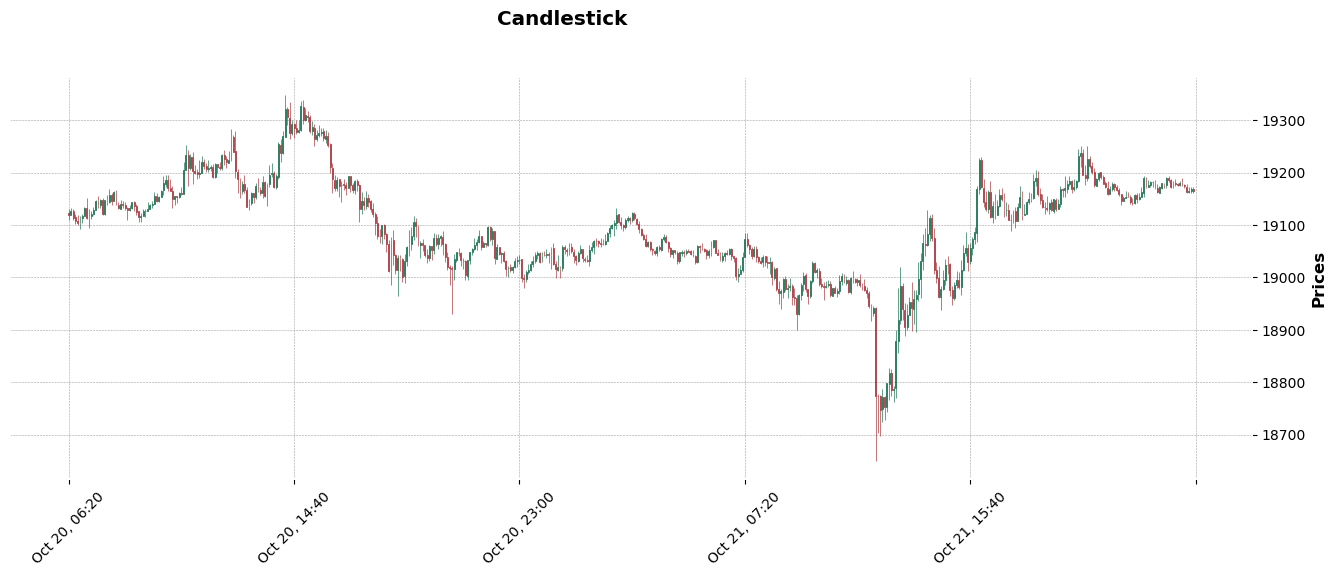

In [17]:
# Plot candlestick chart

# ระบุ date_start กับ date_end หรือระบุ window_chart อย่างใดอย่างหนึ่ง
date_start = '' # example: 20200101 format is YYYYmmdd
date_end = '' # example: 20200131 format is YYYYmmdd
window_chart = 500 # จำนวนแท่งราคาล่าสุดที่ต้องการแสดงผล

chart_width = 30 # ระบุความกว้า่ง
chart_height = 10 # ระบุความสูง

df_ohlc = pd.DataFrame()

if 'TIME' in dataset.columns:
    dataset['TIME'] = dataset['TIME'].map('{:0>6}'.format)
    df_ohlc['DATETIME'] = dataset['DATE'].astype('string') + dataset['TIME'].astype('string')
else:
    df_ohlc['DATETIME'] = dataset['DATETIME']
    
df_ohlc['Open'] = dataset['OPEN']
df_ohlc['High'] = dataset['HIGH']
df_ohlc['Low'] = dataset['LOW']
df_ohlc['Close'] = dataset['CLOSE']

# Get sub data
df_ohlc = data_range(df_ohlc, from_date=date_start, to_date=date_end, window=window_chart)

df_ohlc['DATETIME'] = pd.to_datetime(df_ohlc['DATETIME'], format='%Y%m%d%H%M%S')
df_ohlc.set_index('DATETIME', inplace=True)

plot_ohlc(df_ohlc
            , type='candle' # type='line'
            , style='charles'
            , title='Candlestick'
            , ylabel='Prices'
            , figratio=(chart_width, chart_height),)

## Create technical indicators using Pandas-TA

ใน cell ด้านล่างนี้มาฝึกเขียนโค้ดสร้างอินดิเคเตอร์ต่างๆ กันครับ เช่น Moving Average, Bollinger Band, RSI (Relative Strength Index), Stochastics แบบ slow stochastics, MACD (Moving Average Convergence/Divergence), ATR (Average True Range)
การสร้างอินดิเคเตอร์เราจะใช้ python library ชื่อ Pandas-TA ครับ สมัยก่อนเราใช้ TA-Lib แต่ค่อนข้างมีปัญหาจุกจิกเยอะในการติดตั้ง ปัจจุบันเราจึงเปลี่ยนมาใช้ Pandas-TA แทน

อ้างอิง
- Pandas-TA: https://github.com/twopirllc/pandas-ta

In [18]:
# SMA
dataset['MA1'] = pdta.sma(dataset['CLOSE'], 50)

# WMA
dataset['MA2'] = pdta.wma(dataset['CLOSE'], 100)

# EMA
dataset['MA3'] = pdta.ema(dataset['CLOSE'], 300)

# RSI
dataset['RSI_S'] = pdta.rsi(dataset['CLOSE'], 14)
dataset['RSI_M'] = pdta.rsi(dataset['CLOSE'], 28)
dataset['RSI_L'] = pdta.ema( pdta.rsi(dataset['CLOSE'], 50), 20 )

# MACD
df_macd_s = pdta.macd(dataset['CLOSE'], 12, 26, 9)
dataset['MACD_S'] = df_macd_s.iloc[:, 0]
dataset['MACD_HIST_S'] = df_macd_s.iloc[:,1 ]
dataset['MACD_SIGNAL_S'] = df_macd_s.iloc[:, 2]

# ATR
dataset['ATR'] = pdta.atr(dataset['HIGH']
                          , dataset['LOW']
                          , dataset['CLOSE']
                          , 20)

# NATR (Normalized Average True Range)
dataset['NATR'] = pdta.natr(dataset['HIGH']
                          , dataset['LOW']
                          , dataset['CLOSE']
                          , 20)
dataset['NATR'] = dataset['NATR'] * 100

# Slow Stochastics
df_slow_s = pdta.stoch(dataset['HIGH']
                       , dataset['LOW']
                       , dataset['CLOSE']
                       , 9, 3, 3, 'wma')
dataset['STOCHK_S'] = df_slow_s.iloc[:, 0]
dataset['STOCHD_S'] = df_slow_s.iloc[:, 1]

# Slow Stochastics
df_slow_m = pdta.stoch(dataset['HIGH']
                       , dataset['LOW']
                       , dataset['CLOSE']
                       , 90, 30, 30, 'wma')
dataset['STOCHK_M'] = df_slow_m.iloc[:, 0]
dataset['STOCHD_M'] = df_slow_m.iloc[:, 1]

dataset.fillna(0.0, inplace=True) # fill ค่า NaN ด้วยค่า 0.0

dataset

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,MA1,MA2,MA3,RSI_S,...,RSI_L,MACD_S,MACD_HIST_S,MACD_SIGNAL_S,ATR,NATR,STOCHK_S,STOCHD_S,STOCHK_M,STOCHD_M
0,20151008134000,0.00,242.96,0.00,242.96,0.00000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20151008134500,242.96,243.00,242.96,243.00,0.00000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,20151008135000,243.00,245.00,243.00,245.00,0.00000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,20151008135500,245.00,245.00,245.00,245.00,0.00000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,20151008140000,245.00,245.00,244.50,244.50,0.00000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738592,20221021233500,19177.04,19178.72,19171.35,19173.45,44.59226,19176.8854,19168.053531,19096.358736,49.775339,...,52.987389,2.445123,-0.302977,2.748100,16.933133,8.831553,22.735119,31.759574,67.146696,72.333691
738593,20221021234000,19172.65,19178.51,19161.75,19162.07,95.44350,19176.6666,19168.193992,19096.795356,44.594104,...,52.858416,1.112630,-1.308376,2.421006,16.924477,8.832280,8.679247,18.064005,65.640699,71.767283
738594,20221021234500,19162.07,19173.26,19160.32,19165.42,37.45269,19176.3108,19168.371468,19097.251333,46.364059,...,52.766142,0.323212,-1.678235,2.001447,16.725253,8.726787,11.056284,12.210409,64.323736,71.154958
738595,20221021235000,19165.42,19172.01,19160.00,19168.54,32.17750,19175.0550,19168.587004,19097.725012,48.029234,...,52.705620,-0.050073,-1.641216,1.591143,16.489490,8.602372,20.621587,15.442761,63.173019,70.507562


## Plot graph
มาพล็อตกราฟอินเคเตอร์เพื่อ visualize กันเลย กราฟบนสุดเป็นกราฟราคาที่ใช้กราฟเส้นนะ เพราะถ้าใช้กราฟแท่งเทียนแล้วแสดงเส้นอินดิเคเตอร์อื่นๆ แบบ overlay มันจะค่อนข้างช้า ในโค้ดตัวอย่างใน cell นี้จึงใช้เป็นกราฟเส้นแทนครับ

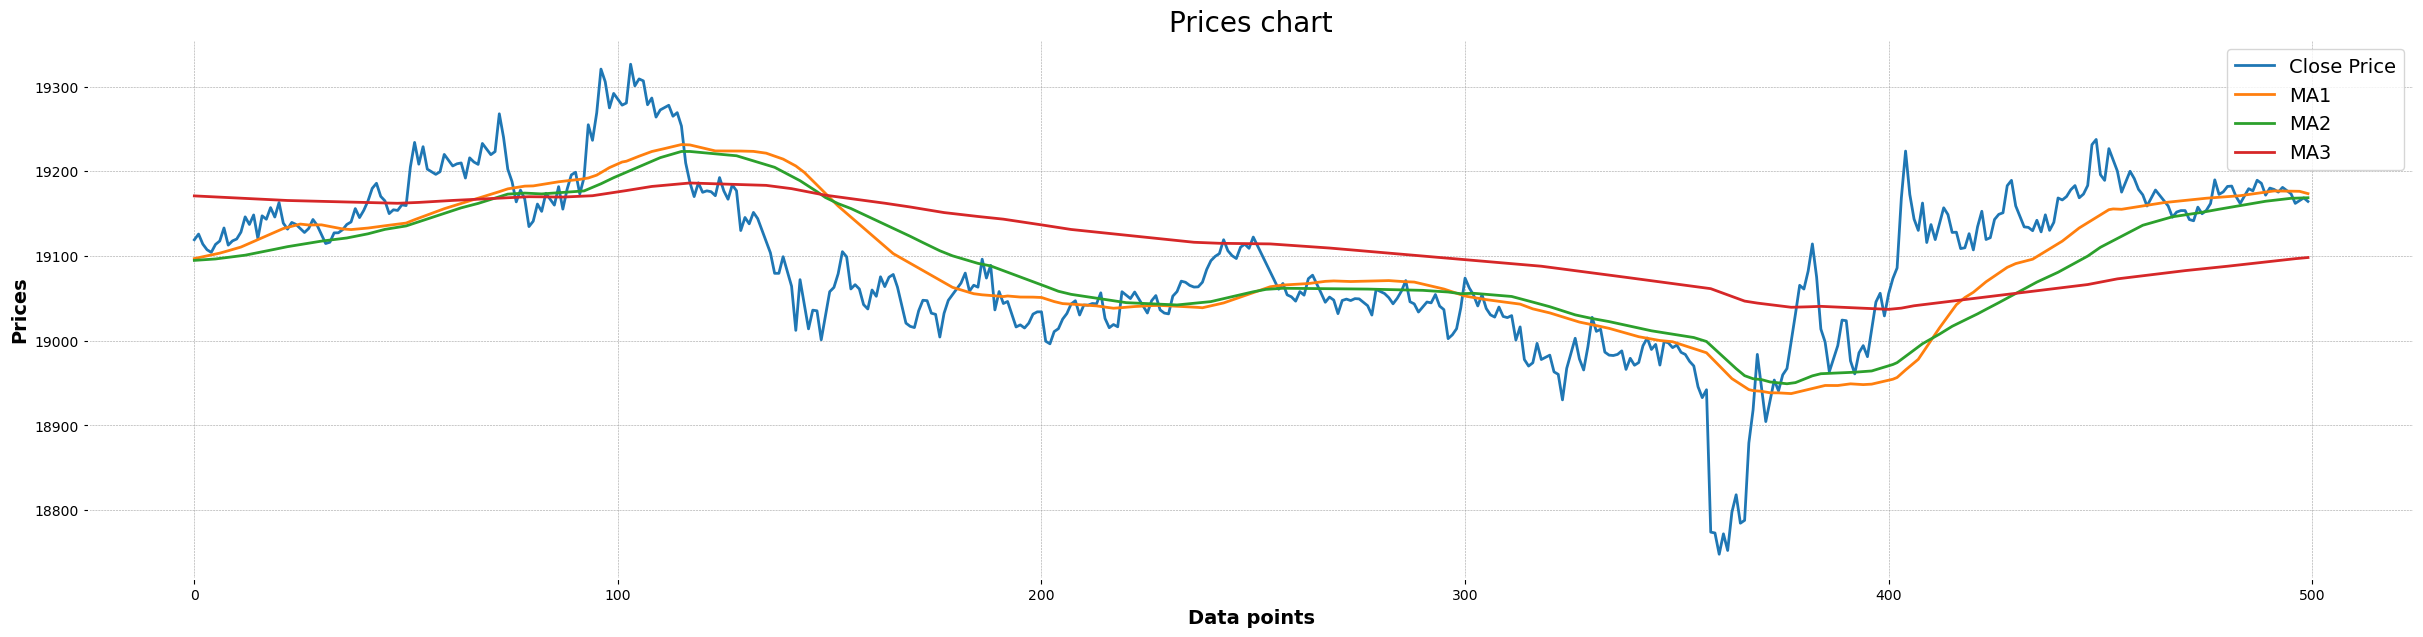

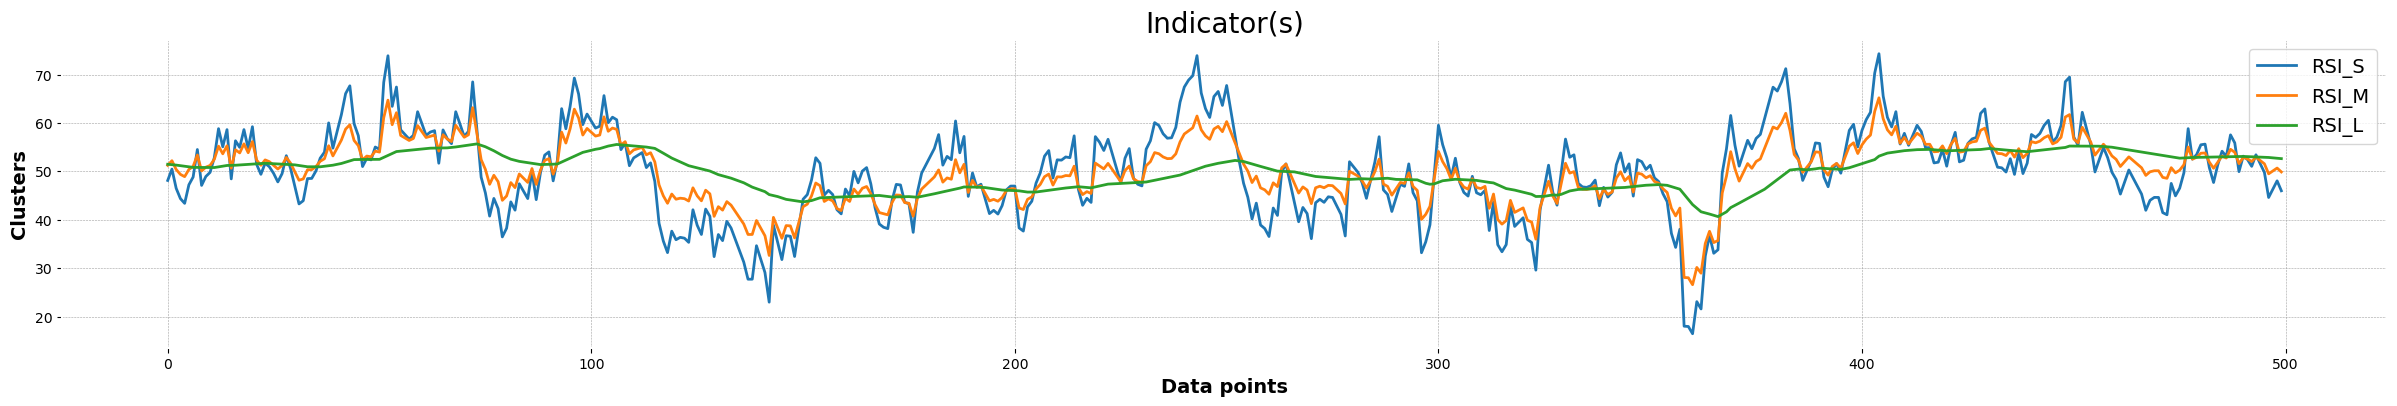

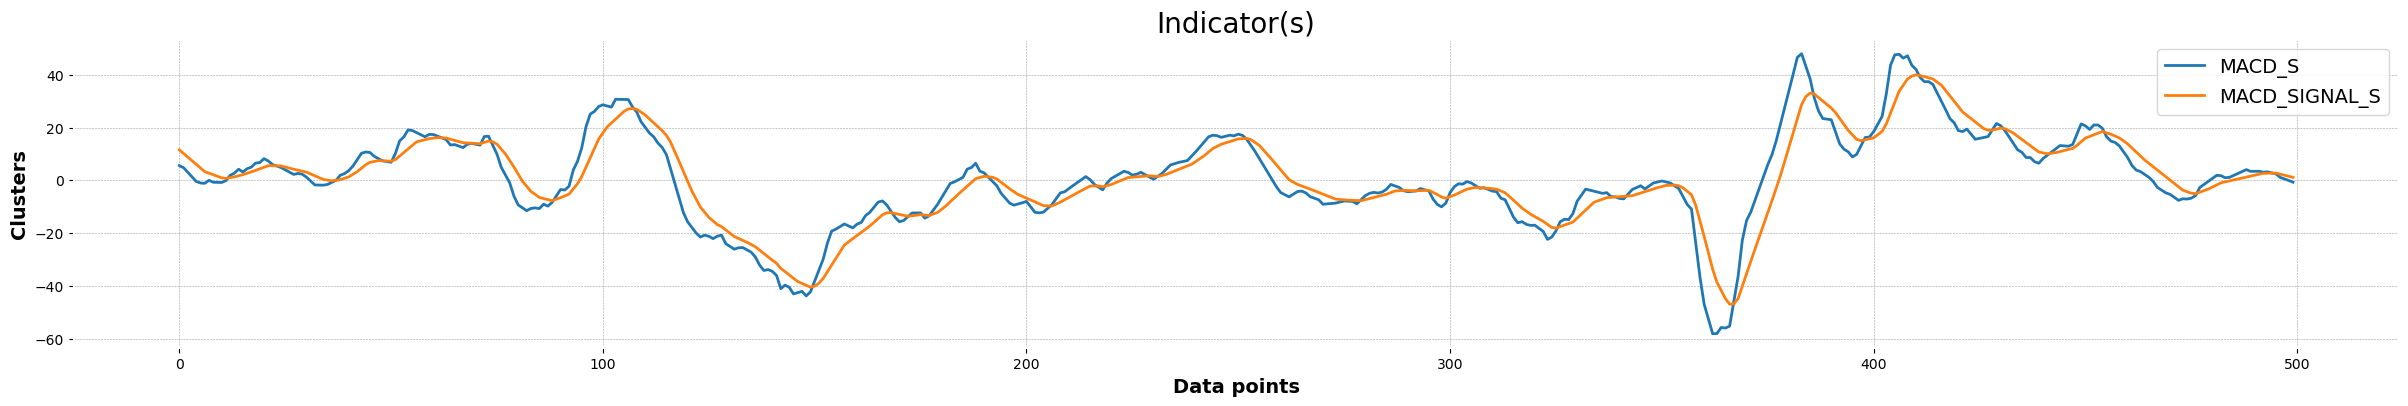

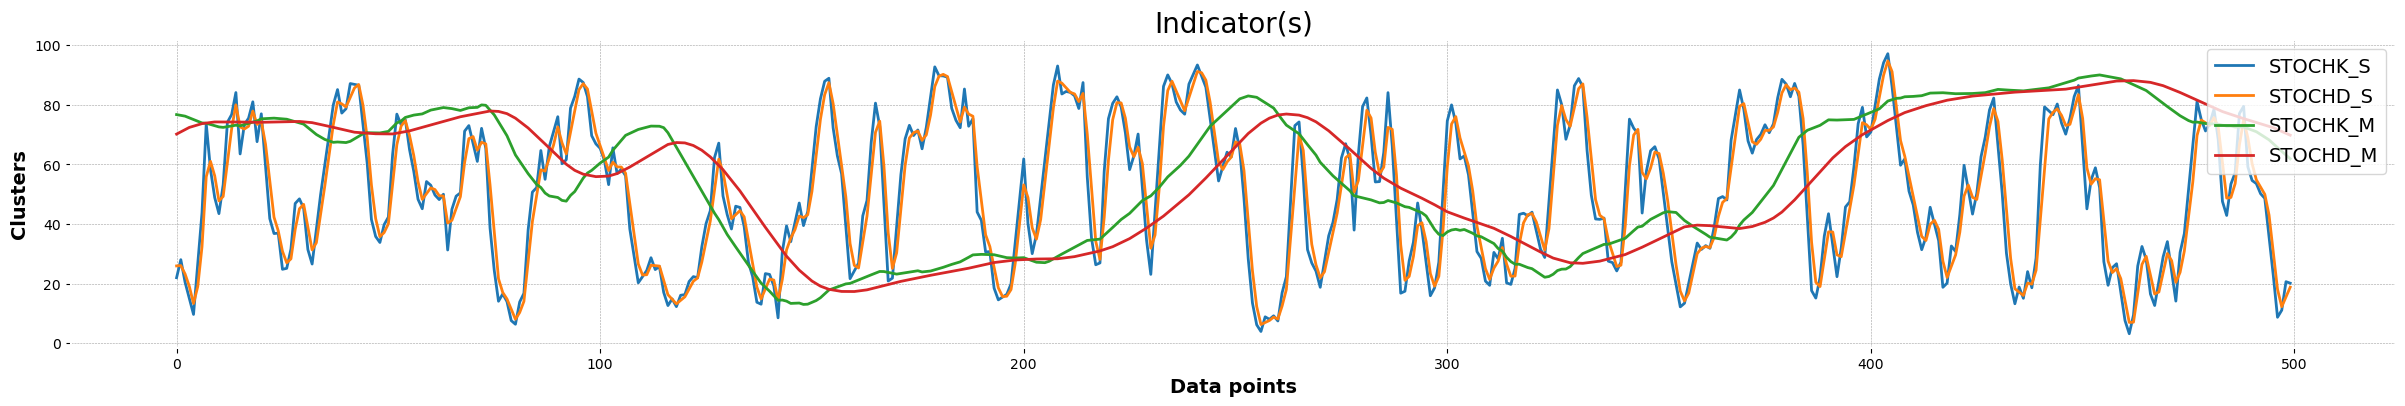

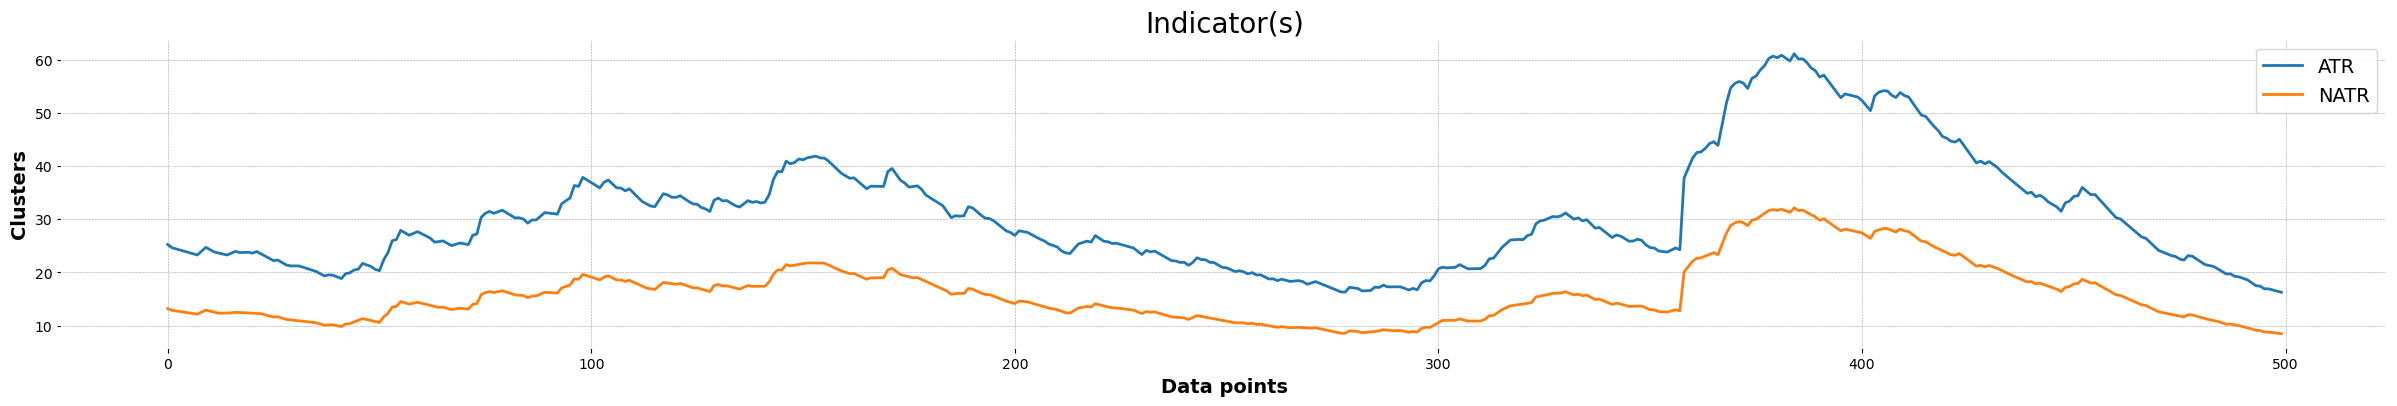

In [19]:
# Setting

chart_width = 30
chart_height = 7

# ระบุ date_start กับ date_end หรือระบุ window_chart อย่างใดอย่างหนึ่ง
date_start = '' # example: 20200101 format is YYYYmmdd
date_end = '' # example: 20200131 format is YYYYmmdd
window_chart = 500 # จำนวนแท่งราคาล่าสุดที่ต้องการแสดงผล

#===============================================================================================

df_indi = pd.DataFrame(dataset, copy=True)
total_rows = df_indi.shape[0]

if 'TIME' in df_indi.columns:
    df_indi['TIME'] = dataset['TIME'].map('{:0>6}'.format)
    df_indi['DATETIME'] = dataset['DATE'].astype('string') + dataset['TIME'].astype('string')

# Get sub data
df = data_range(df_indi, from_date=date_start, to_date=date_end, window=window_chart)
new_total_rows = df.shape[0]
    
#===============================================================================================

# Plot price chart

plt.figure(figsize=(chart_width, chart_height))

x = np.arange(new_total_rows)
y = df['CLOSE']
plt.plot(x, y, label='Close Price')

x = np.arange(new_total_rows)
y = df['MA1']
plt.plot(x, y, label='MA1')

x = np.arange(new_total_rows)
y = df['MA2']
plt.plot(x, y, label='MA2')

x = np.arange(new_total_rows)
y = df['MA3']
plt.plot(x, y, label='MA3')

plt.xlabel('Data points', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.title('Prices chart', fontsize=20)
plt.legend(loc='upper right', fontsize=14)
plt.show()

#===============================================================================================

def plot_indi(data, cols):    
    for i in range(0, len(cols)):
        x = np.arange(new_total_rows)
        y = data[cols[i]]
        plt.plot(x, y, label=cols[i])

#===============================================================================================

# Plot indicators, features
chart_width = 30
chart_height = 4
plt.figure(figsize=(chart_width, chart_height))

plot_indi(df, ['RSI_S', 'RSI_M', 'RSI_L'])

plt.title('Indicator(s)', fontsize=20)
plt.xlabel('Data points', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

#===============================================================================================

# Plot indicators, features
chart_width = 30
chart_height = 4
plt.figure(figsize=(chart_width, chart_height))

plot_indi(df, ['MACD_S', 'MACD_SIGNAL_S'])

plt.title('Indicator(s)', fontsize=20)
plt.xlabel('Data points', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

#===============================================================================================

# Plot indicators, features
chart_width = 30
chart_height = 4
plt.figure(figsize=(chart_width, chart_height))

plot_indi(df, ['STOCHK_S', 'STOCHD_S', 'STOCHK_M', 'STOCHD_M'])

plt.title('Indicator(s)', fontsize=20)
plt.xlabel('Data points', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

#===============================================================================================

# Plot indicators, features
chart_width = 30
chart_height = 4
plt.figure(figsize=(chart_width, chart_height))

plot_indi(df, ['ATR', 'NATR'])

plt.title('Indicator(s)', fontsize=20)
plt.xlabel('Data points', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()